<a href="https://colab.research.google.com/github/KruthikaTS/IISc---Single-cell-rna-seq-analysis/blob/main/Single_cell_seurat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages (only if not already installed)
if (!requireNamespace("Seurat", quietly = TRUE)) install.packages("Seurat")
if (!requireNamespace("data.table", quietly = TRUE)) install.packages("data.table")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("patchwork", quietly = TRUE)) install.packages("patchwork")
if (!requireNamespace("ggpubr", quietly = TRUE)) install.packages("ggpubr")

# Load libraries
library(Seurat)
library(data.table)
library(ggplot2)
library(patchwork)
library(ggpubr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘goftest’, ‘igraph’, ‘leidenbase’, ‘spatstat.explore’


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [ ]:
# Unzip all required files
# Unzip all input files
system("gunzip -f KinaseScreen_UMI_matrix.csv.gz")
system("gunzip -f barcode_counts.csv.gz")
system("gunzip -f barcode_annotations.csv.gz")
system("gunzip -f KinaseScreen_metadata.csv.gz")  # This directly gives KinaseScreen_metadata.csv




In [ ]:
# Read the extracted metadata file
library(data.table)
metadata <- fread("KinaseScreen_metadata.csv")


In [ ]:
# Read the expression matrix
expr <- fread("KinaseScreen_UMI_matrix.csv", header = TRUE)

# Extract gene names and convert to matrix
gene_names <- expr[[1]]
expr <- expr[, -1, with = FALSE]
rownames(expr) <- make.unique(as.character(gene_names))
expression_matrix <- as.matrix(expr)
mode(expression_matrix) <- "numeric"


In [ ]:
metadata <- as.data.frame(metadata)

seurat_obj <- AddMetaData(seurat_obj, metadata = metadata)



In [ ]:
# Create Seurat object
seurat_obj <- CreateSeuratObject(
  counts = expression_matrix,
  project = "Kinase_Screen",
  min.cells = 3,
  min.features = 200
)

# Convert metadata to data.frame to avoid data.table subsetting issues
metadata <- as.data.frame(metadata)

# Remove duplicate barcodes
metadata <- metadata[!duplicated(metadata$Barcode), ]

# Set rownames and align to Seurat object barcodes
rownames(metadata) <- metadata$Barcode
metadata <- metadata[colnames(seurat_obj), ]

# Add cleaned metadata
seurat_obj <- AddMetaData(seurat_obj, metadata = metadata)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [ ]:
system("gunzip -kf KinaseScreen_UMI_matrix.csv.gz")
system("gunzip -kf barcode_counts.csv.gz")
system("gunzip -kf barcode_annotations.csv.gz")
system("gunzip -kf KinaseScreen_metadata.csv.gz")


In [ ]:
# Read metadata
metadata <- fread("KinaseScreen_metadata.csv", data.table = FALSE)

# Check for duplicates
sum(duplicated(metadata$Barcode))  # <- tells you how many are duplicated

# Optional: View the duplicated barcodes
metadata$Barcode[duplicated(metadata$Barcode)]

# Remove duplicated rows (keep only the first occurrence)
metadata <- metadata[!duplicated(metadata$Barcode), ]

# Now set rownames safely
rownames(metadata) <- metadata$Barcode

# Align metadata with the Seurat object
metadata <- metadata[colnames(seurat_obj), ]

# Add metadata to Seurat object
seurat_obj <- AddMetaData(seurat_obj, metadata)






[1] 5548

[1] "Bar65" "Bar65" "Bar65" "Bar57" "Bar57" "Bar59" "Bar65" "Bar67" "Bar57"
  [10] "Bar50" "Bar65" "Bar55" "Bar60" "Bar57" "Bar70" "Bar64" "Bar50" "Bar70"
  [19] "Bar67" "Bar50" "Bar51" "Bar64" "Bar65" "Bar70" "Bar55" "Bar69" "Bar69"
  [28] "Bar50" "Bar65" "Bar53" "Bar51" "Bar66" "Bar58" "Bar50" "Bar50" "Bar55"
  [37] "Bar69" "Bar50" "Bar58" "Bar68" "Bar57" "Bar57" "Bar65" "Bar59" "Bar65"
  [46] "Bar51" "Bar50" "Bar68" "Bar60" "Bar65" "Bar59" "Bar65" "Bar50" "Bar58"
  [55] "Bar51" "Bar69" "Bar58" "Bar57" "Bar65" "Bar59" "Bar65" "Bar60" "Bar50"
  [64] "Bar55" "Bar50" "Bar50" "Bar66" "Bar65" "Bar55" "Bar64" "Bar69" "Bar57"
  [73] "Bar55" "Bar60" "Bar65" "Bar59" "Bar65" "Bar57" "Bar61" "Bar60" "Bar57"
  [82] "Bar70" "Bar65" "Bar67" "Bar69" "Bar71" "Bar61" "Bar61" "Bar70" "Bar58"
  [91] "Bar65" "Bar69" "Bar57" "Bar65" "Bar51" "Bar65" "Bar68" "Bar68" "Bar59"
 [100] "Bar58" "Bar60" "Bar59" "Bar57" "Bar69" "Bar61" "Bar69" "Bar64" "Bar57"
 [109] "Bar57" "Bar65" "Bar65" "Bar66" "Bar65" "Bar67" "Bar69" "Bar65" "Bar51"
 [118] "Bar57" "Bar57" "Bar69" "Bar65" "Bar64" "Bar57" "Bar69" "Bar66" "Bar59"
 [127] "Bar65" "Bar69" "Bar50" "Bar50" "Bar65" "Bar57" "Bar60" "Bar69" "Bar68"
 [136] "Bar50" "Bar59" "Bar65" "Bar66" "Bar68" "Bar69" "Bar65" "Bar64" "Bar60"
 [145] "Bar66" "Bar69" "Bar65" "Bar58" "Bar66" "Bar65" "Bar65" "Bar57" "Bar60"
 [154] "Bar66" "Bar68" "Bar61" "Bar65" "Bar70" "Bar57" "Bar66" "Bar70" "Bar65"
 [163] "Bar59" "Bar51" "Bar58" "Bar58" "Bar59" "Bar64" "Bar70" "Bar57" "Bar50"
 [172] "Bar58" "Bar69" "Bar71" "Bar65" "Bar50" "Bar57" "Bar65" "Bar65" "Bar65"
 [181] "Bar51" "Bar51" "Bar50" "Bar59" "Bar58" "Bar65" "Bar65" "Bar64" "Bar59"
 [190] "Bar59" "Bar61" "Bar68" "Bar50" "Bar57" "Bar64" "Bar69" "Bar59" "Bar65"
 [199] "Bar57" "Bar65" "Bar72" "Bar69" "Bar66" "Bar66" "Bar59" "Bar51" "Bar59"
 [208] "Bar51" "Bar65" "Bar66" "Bar51" "Bar57" "Bar69" "Bar50" "Bar67" "Bar70"
 [217] "Bar72" "Bar68" "Bar58" "Bar55" "Bar64" "Bar57" "Bar59" "Bar69" "Bar50"
 [226] "Bar57" "Bar55" "Bar57" "Bar69" "Bar65" "Bar69" "Bar68" "Bar61" "Bar57"
 [235] "Bar64" "Bar65" "Bar57" "Bar51" "Bar65" "Bar50" "Bar51" "Bar50" "Bar57"
 [244] "Bar57" "Bar64" "Bar71" "Bar65" "Bar50" "Bar60" "Bar50" "Bar69" "Bar70"
 [253] "Bar57" "Bar50" "Bar57" "Bar66" "Bar64" "Bar57" "Bar53" "Bar65" "Bar58"
 [262] "Bar65" "Bar65" "Bar64" "Bar65" "Bar50" "Bar65" "Bar69" "Bar50" "Bar69"
 [271] "Bar65" "Bar68" "Bar67" "Bar68" "Bar65" "Bar68" "Bar50" "Bar60" "Bar71"
 [280] "Bar57" "Bar59" "Bar68" "Bar68" "Bar57" "Bar69" "Bar69" "Bar65" "Bar64"
 [289] "Bar50" "Bar57" "Bar57" "Bar57" "Bar66" "Bar69" "Bar64" "Bar67" "Bar69"
 [298] "Bar59" "Bar69" "Bar59" "Bar60" "Bar51" "Bar58" "Bar65" "Bar65" "Bar64"
 [307] "Bar67" "Bar65" "Bar61" "Bar58" "Bar61" "Bar68" "Bar50" "Bar65" "Bar51"
 [316] "Bar53" "Bar51" "Bar59" "Bar72" "Bar68" "Bar65" "Bar65" "Bar58" "Bar72"
 [325] "Bar68" "Bar50" "Bar69" "Bar55" "Bar65" "Bar65" "Bar65" "Bar65" "Bar59"
 [334] "Bar67" "Bar57" "Bar57" "Bar71" "Bar72" "Bar59" "Bar66" "Bar65" "Bar61"
 [343] "Bar68" "Bar64" "Bar69" "Bar65" "Bar66" "Bar50" "Bar71" "Bar68" "Bar67"
 [352] "Bar58" "Bar57" "Bar67" "Bar65" "Bar66" "Bar69" "Bar65" "Bar60" "Bar59"
 [361] "Bar51" "Bar58" "Bar58" "Bar57" "Bar65" "Bar69" "Bar69" "Bar50" "Bar64"
 [370] "Bar69" "Bar51" "Bar70" "Bar51" "Bar53" "Bar65" "Bar69" "Bar68" "Bar69"
 [379] "Bar71" "Bar55" "Bar59" "Bar51" "Bar71" "Bar50" "Bar53" "Bar58" "Bar66"
 [388] "Bar50" "Bar67" "Bar65" "Bar66" "Bar67" "Bar66" "Bar50" "Bar69" "Bar50"
 [397] "Bar65" "Bar65" "Bar51" "Bar65" "Bar68" "Bar65" "Bar68" "Bar69" "Bar65"
 [406] "Bar50" "Bar67" "Bar58" "Bar65" "Bar67" "Bar57" "Bar55" "Bar65" "Bar69"
 [415] "Bar59" "Bar65" "Bar67" "Bar65" "Bar57" "Bar60" "Bar55" "Bar69" "Bar65"
 [424] "Bar65" "Bar53" "Bar51" "Bar57" "Bar51" "Bar66" "Bar50" "Bar66" "Bar66"
 [433] "Bar55" "Bar64" "Bar65" "Bar65" "Bar57" "Bar61" "Bar70" "Bar69" "Bar51"
 [442] "Bar64" "Bar57" "Bar57" "Bar50" "Bar67" "Bar69" "Bar65" "Bar59" "Bar51"
 [451] "Bar50" "Bar50" "Bar65" "Bar65" "Bar69" "Bar50

In [ ]:
# Read metadata and convert to data.frame
metadata <- fread("KinaseScreen_metadata.csv", data.table = FALSE)

# Filter out rows where Barcode is NA or empty
metadata <- metadata[!is.na(metadata$Barcode) & metadata$Barcode != "", ]




In [ ]:
metadata$Barcode <- make.unique(metadata$Barcode)


In [ ]:
rownames(metadata) <- metadata$Barcode


In [ ]:
# Make sure the metadata rows match the cells in seurat_obj
metadata <- metadata[colnames(seurat_obj), ]
seurat_obj <- AddMetaData(seurat_obj, metadata)


In [ ]:
umi_matrix <- read.csv("KinaseScreen_UMI_matrix.csv", row.names = 1)
umi_matrix <- as.matrix(umi_matrix)


In [ ]:
library(Seurat)
seurat_obj <- CreateSeuratObject(counts = umi_matrix, project = "KinaseScreen")


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [ ]:
seurat_obj
head(seurat_obj@meta.data)


An object of class Seurat 
12926 features across 5574 samples within 1 assay 
Active assay: RNA (12926 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCAAGAGATTCA,KinaseScreen,10727,3203
AAACCCAGTAGAATGT,KinaseScreen,11975,3329
AAACCCAGTGCTCCGA,KinaseScreen,9783,2923
AAACCCAGTTCATCGA,KinaseScreen,7050,2476
AAACCCAGTTCTATCT,KinaseScreen,9665,3112
AAACGAAAGACGACGT,KinaseScreen,16386,3697


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


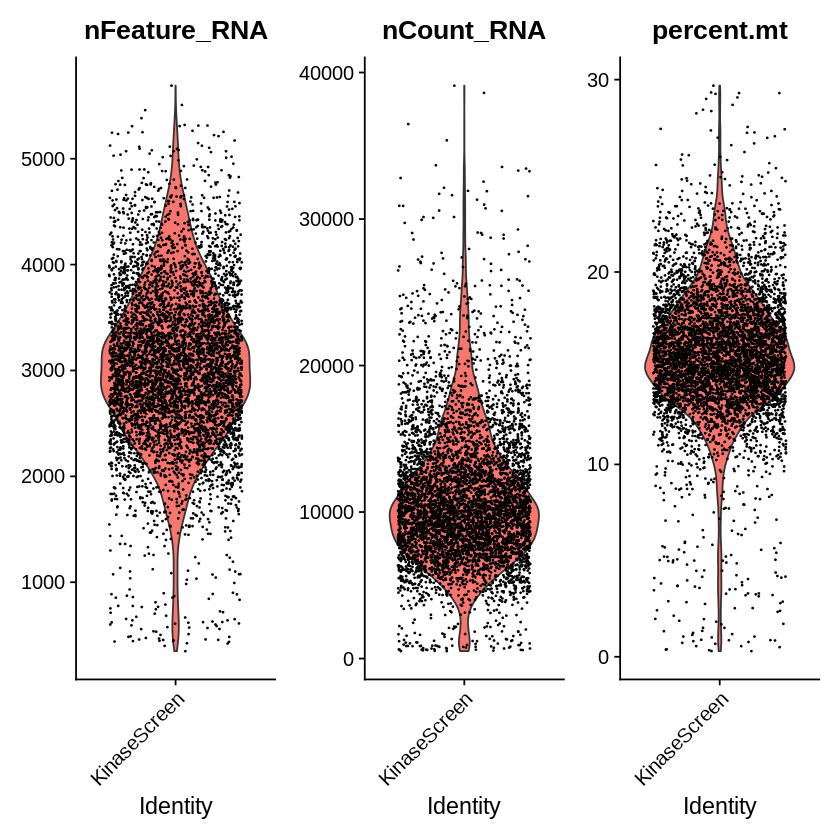

In [ ]:
#QC and violin  plot
seurat_obj[["percent.mt"]] <- PercentageFeatureSet(seurat_obj, pattern = "^MT-")
VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)



In [ ]:
seurat_obj <- subset(seurat_obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)


In [ ]:
#normlaise
seurat_obj <- NormalizeData(seurat_obj, normalization.method = "LogNormalize", scale.factor = 10000)
seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)



Normalizing layer: counts

Finding variable features for layer counts

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.8877”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.31949”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.031008”


When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


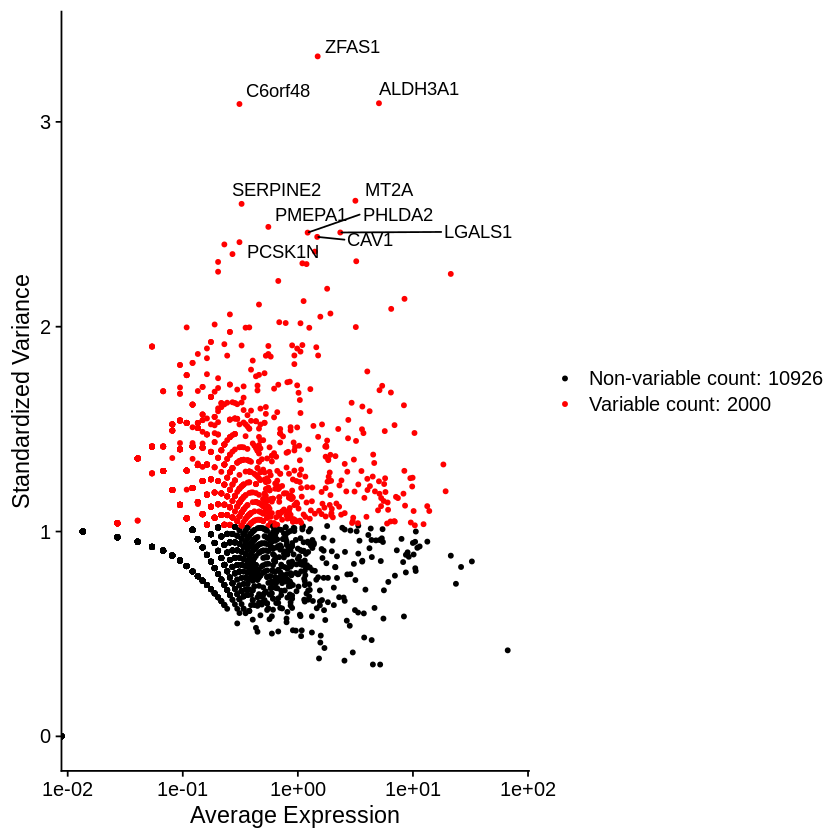

In [ ]:
#variable feature identification:
# First, generate the variable feature plot and store it
plot1 <- VariableFeaturePlot(seurat_obj)

# Now label the top 10 variable genes on this plot
LabelPoints(plot = plot1, points = top10, repel = TRUE)


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  HIST1H1D, MT-ND2, MSH6, MT-ND1, HIST1H1B, CENPF, TOP2A, MT-CO2, DLGAP5, MT-ND4L 
	   PNPT1, DSP, MSH2, KIF23, AKAP12, NCAPG, MT-CO1, ANLN, CHD1, SLF1 
	   ATAD2, MCM4, KIAA1109, NKTR, CEP70, SRSF1, WDR76, DMXL2, PRPF8, MED13L 
Negative:  TIMP1, OST4, ATP5MD, RABAC1, TOMM7, CSTB, LGALS3, RAC1, SH3BGRL3, HSPB1 
	   BTG1, C9orf16, UBA52, EIF3K, RPL13, ELOB, RPLP0, CHURC1, RPL13A, GSTK1 
	   NDUFS8, ATOX1, LGALS1, MMP24OS, MGLL, COPS9, RPL10, LAMTOR2, EID1, S100A10 
PC_ 2 
Positive:  RPS26, MRPS12, ALDH3A1, COX14, TPI1, POLR2L, KRT18, CBR1, PHLDA2, UQCRQ 
	   PMVK, DDT, ATP5MC1, UBE2S, MCTS1, NDUFAF3, PNKD, HIST1H4C, PSMA7, HMGN3 
	   RANBP1, AREG, SAP18, COTL1, PARK7, RAB5C, TMEM205, C1orf122, GAPDH, GPX2 
Negative:  NEAT1, MALAT1, SPOCK1, GOLGB1, SERTAD2, C6orf48, ARID4A, PA

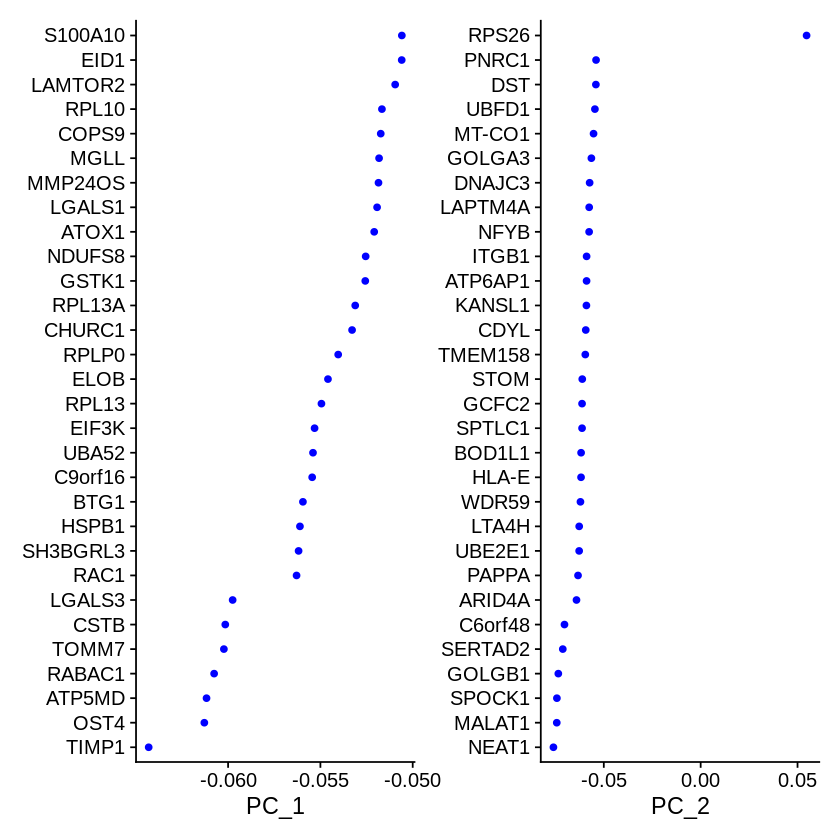

Warning message:
“Requested number is larger than the number of available items (74). Setting to 74.”


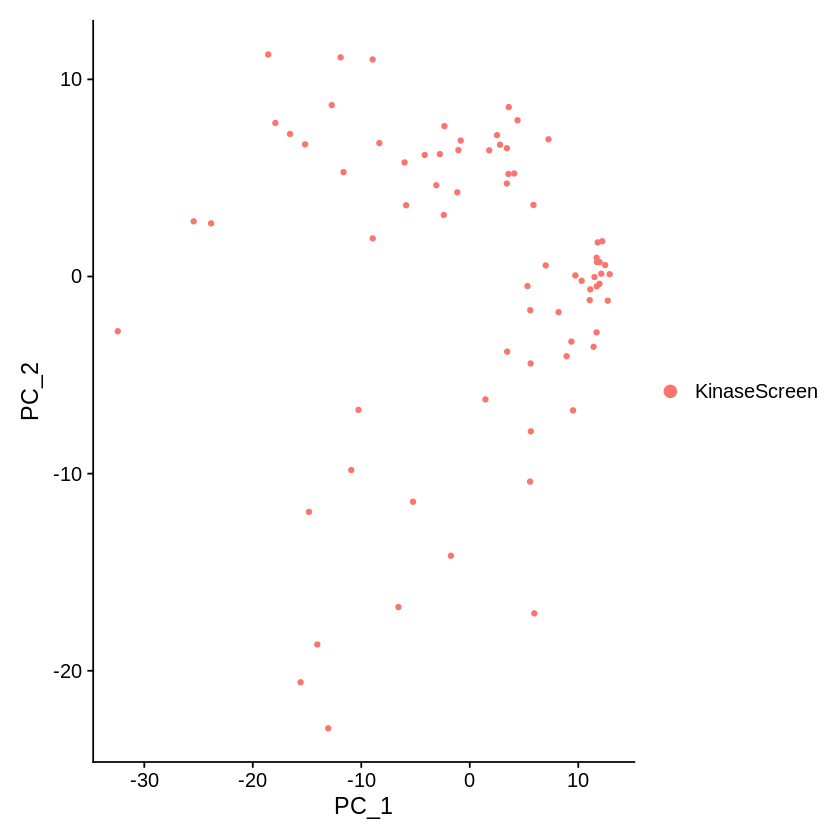

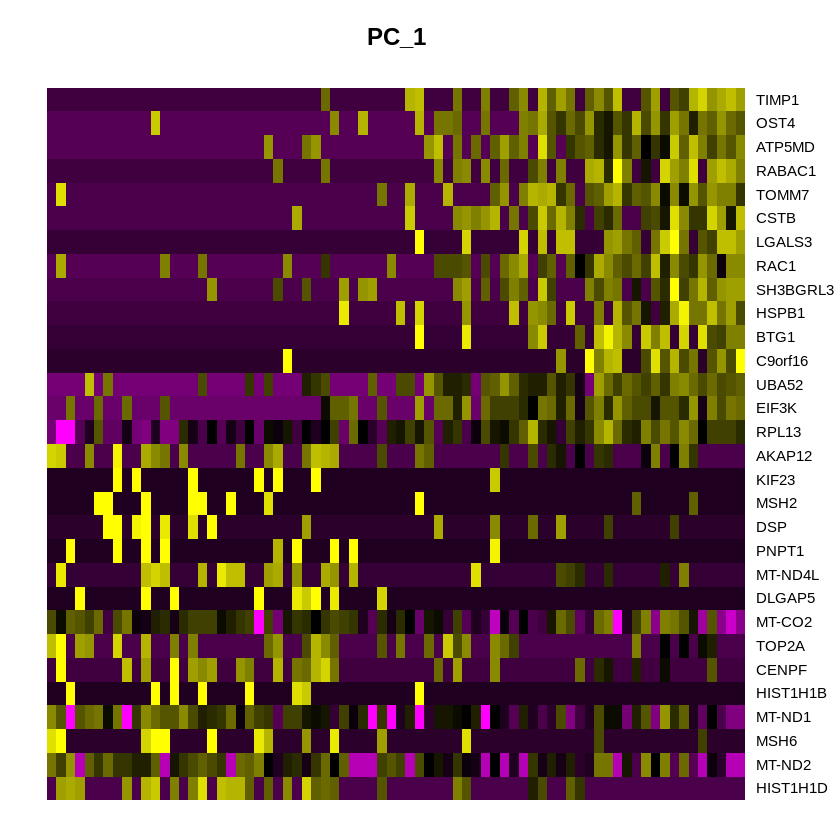

In [ ]:
#pca

seurat_obj <- ScaleData(seurat_obj)
seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj))
VizDimLoadings(seurat_obj, dims = 1:2, reduction = "pca")
DimPlot(seurat_obj, reduction = "pca")
DimHeatmap(seurat_obj, dims = 1, cells = 500, balanced = TRUE)



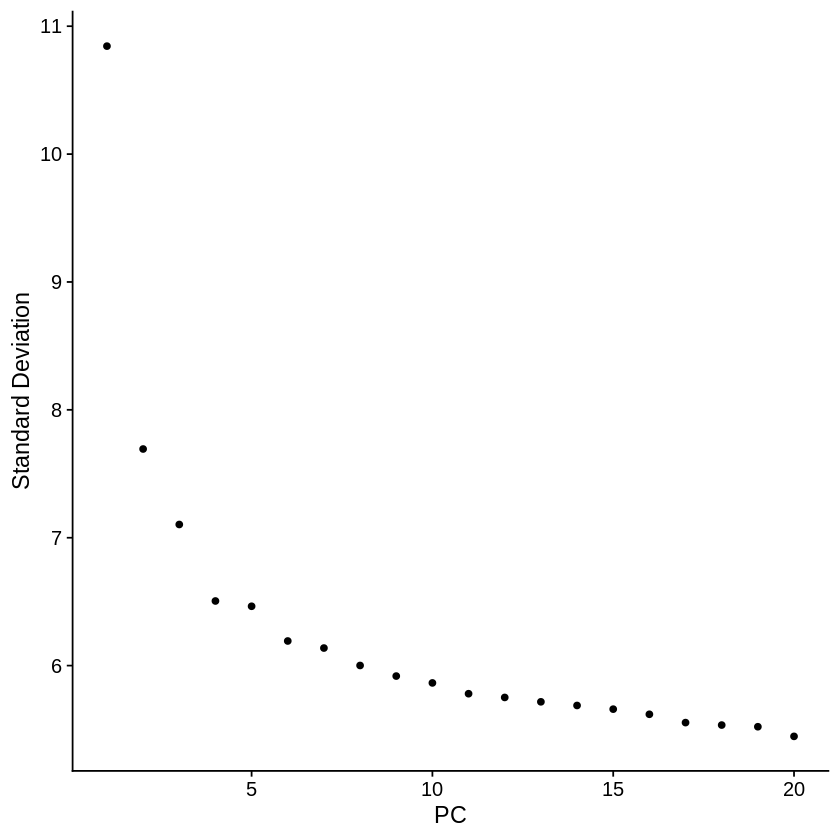

In [ ]:
ElbowPlot(seurat_obj)  # Instead of ElbowPlot(object)


In [ ]:
#checking if wwe have hotair in dataset
# Check if gene symbol is present
"HOTAIR" %in% rownames(seurat_obj)

# Check if Ensembl ID is present
"ENSG00000228630" %in% rownames(seurat_obj)

# Print any matches that contain "HOTAIR"
grep("HOTAIR", rownames(seurat_obj), value = TRUE)

# Bonus: check if anything even remotely matches "hotair"
grep("hotair", rownames(seurat_obj), value = TRUE, ignore.case = TRUE)



[1] FALSE

[1] FALSE

[1] "HOTAIRM1"

[1] "HOTAIRM1"

In [ ]:
#Option 2: Do a full search. Search for anything that might resemble HOTAIR or its family:

grep("HOTAIR", rownames(seurat_obj), value = TRUE)

grep("HOX", rownames(seurat_obj), value = TRUE)  # HOTAIR is a lncRNA in HOXC cluster


[1] "HOTAIRM1"

[1] "HOXD11"    "HOXD-AS2"  "HOXD8"     "SHOX2"     "HOXA1"     "HOXA2"    
 [7] "HOXA3"     "HOXA-AS2"  "HOXA4"     "HOXA5"     "HOXA6"     "HOXA7"    
[13] "HOXA10-AS" "HOXA10"    "HOXA13"    "HOXC13-AS" "HOXC13"    "HOXC10"   
[19] "HOXC6"     "HOXC9"     "HOXC-AS1"  "HOXC8"     "HOXC4"     "HOXC5"    
[25] "HOXB2"     "HOXB-AS1"  "HOXB3"     "HOXB4"     "HOXB5"     "HOXB6"    
[31] "HOXB7"     "HOXB8"     "HOXB9"     "HOXB13"

In [ ]:
grep("ENSG00000228630", rownames(data), value = TRUE)
grep("HOTAIR", rownames(data), value = TRUE)



character(0)

character(0)

In [ ]:
#Load raw matrix, this brings the matrix before normalisation to check if hotair had low counts and it got chucked out
raw_counts <- read.csv("KinaseScreen_UMI_matrix.csv", row.names = 1)


In [ ]:
#Check if HOTAIR exists but with low counts

grep("HOTAIR", rownames(raw_counts), value = TRUE) # should find it if it's named directly
grep("ENSG00000228630", rownames(raw_counts), value = TRUE) # gene ID of HOTAIR
grep("HOX", rownames(raw_counts), value = TRUE) # general search for HOX genes


[1] "HOTAIRM1"

character(0)

[1] "HOXD11"    "HOXD-AS2"  "HOXD8"     "SHOX2"     "HOXA1"     "HOXA2"    
 [7] "HOXA3"     "HOXA-AS2"  "HOXA4"     "HOXA5"     "HOXA6"     "HOXA7"    
[13] "HOXA10-AS" "HOXA10"    "HOXA13"    "HOXC13-AS" "HOXC13"    "HOXC10"   
[19] "HOXC6"     "HOXC9"     "HOXC-AS1"  "HOXC8"     "HOXC4"     "HOXC5"    
[25] "HOXB2"     "HOXB-AS1"  "HOXB3"     "HOXB4"     "HOXB5"     "HOXB6"    
[31] "HOXB7"     "HOXB8"     "HOXB9"     "HOXB13"